In [1]:
from sklearn.linear_model import SGDRegressor, SGDClassifier
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import sys
from io import StringIO
import sklearn.metrics
from math import ceil, floor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

In [2]:
regression_ds = ds.make_regression(n_samples=2000, n_features=10, n_targets=1)
X_train, X_test, y_train, y_test = train_test_split(regression_ds[0], regression_ds[1])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

a) wypisywanie zadanych metryk i wartości funkcji straty: co epokę, co mini-batch

- co epokę

In [3]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

model = SGDRegressor(verbose=1)

mean_squared_errors = []
mean_absolute_errors = []

epochs = 5
minibatch_size = 256
minibatches_in_epoch = ceil(len(X_train) / minibatch_size)

for epoch_i in range(epochs):
    for minibatch in range(0, len(X_train), minibatch_size):
        minibatch_end = minibatch + minibatch_size
        if 2 * minibatch > len(X_train):
            minibatch_end = len(X_train)
        model.partial_fit(X_train[minibatch:minibatch_end,], y_train[minibatch:minibatch_end,])
    y_pred = model.predict(X_val)
    mean_squared_errors.append(sklearn.metrics.mean_squared_error(y_val, y_pred))
    mean_absolute_errors.append(sklearn.metrics.mean_absolute_error(y_val, y_pred))
        
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
epoch_end = 0
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    if epoch_end == minibatches_in_epoch - 1:
        loss_list.append(float(line.split("loss: ")[-1]))
        epoch_end = 0
    else:
        epoch_end += 1

for epoch_i, (loss_item, mse_item, mae_item) in enumerate(zip(loss_list, mean_squared_errors, mean_absolute_errors)):
    print(f'Epoch {epoch_i+1}:')
    print(f'Loss:{loss_item}, MSE:{mse_item}, MAE:{mae_item}\n')

Epoch 1:
Loss:40.855192, MSE:47.926342726493246, MAE:5.615109716072008

Epoch 2:
Loss:0.786447, MSE:1.0526966296545133, MAE:0.830193186486131

Epoch 3:
Loss:0.02854, MSE:0.042209402385928976, MAE:0.16553517609596818

Epoch 4:
Loss:0.001881, MSE:0.0029368457529511285, MAE:0.043621547094131415

Epoch 5:
Loss:0.000305, MSE:0.0004658287782237028, MAE:0.017473974581287365



- co minibatch

In [4]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

model = SGDRegressor(verbose=1)

mean_squared_errors = []
mean_absolute_errors = []

epochs = 2
minibatch_size = 256
minibatches_in_epoch = ceil(len(X_train) / minibatch_size)

for epoch_i in range(epochs):
    for minibatch in range(0, len(X_train), minibatch_size):
        minibatch_end = minibatch + minibatch_size
        if 2 * minibatch > len(X_train):
            minibatch_end = len(X_train)
        model.partial_fit(X_train[minibatch:minibatch_end,], y_train[minibatch:minibatch_end,])
        y_pred = model.predict(X_val)
        mean_squared_errors.append(sklearn.metrics.mean_squared_error(y_val, y_pred))
        mean_absolute_errors.append(sklearn.metrics.mean_absolute_error(y_val, y_pred))
        
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
epoch_end = 0
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

for minibatch_i, (loss_item, mse_item, mae_item) in enumerate(zip(loss_list, mean_squared_errors, mean_absolute_errors)):
    print(f'Epoch {floor(minibatch_i/minibatches_in_epoch) + 1} Minibatch {minibatch_i % minibatches_in_epoch + 1}:')
    print(f'Loss:{loss_item}, MSE:{mse_item}, MAE:{mae_item}\n')

Epoch 1 Minibatch 1:
Loss:4407.159996, MSE:2584.047960685875, MAE:41.577007808213004

Epoch 1 Minibatch 2:
Loss:938.262498, MSE:835.2555728251037, MAE:23.60449935958351

Epoch 1 Minibatch 3:
Loss:309.713941, MSE:341.3832814541684, MAE:15.139298492261888

Epoch 1 Minibatch 4:
Loss:132.630393, MSE:72.28992818796102, MAE:6.94033024757318

Epoch 1 Minibatch 5:
Loss:41.564755, MSE:49.50764655487723, MAE:5.739802994193654

Epoch 2 Minibatch 1:
Loss:20.700951, MSE:21.07136179006956, MAE:3.739081530789592

Epoch 2 Minibatch 2:
Loss:8.511067, MSE:9.87129566589192, MAE:2.5550912775218477

Epoch 2 Minibatch 3:
Loss:3.872863, MSE:5.0001801727940425, MAE:1.8200737069943467

Epoch 2 Minibatch 4:
Loss:2.111453, MSE:1.4660836134402846, MAE:0.9827651212825514

Epoch 2 Minibatch 5:
Loss:0.802491, MSE:1.0916068452952783, MAE:0.8477675292062065



b) wizualizacja zadanych metryk i wartości funkcji straty: co epokę, co mini-batch

In [5]:
plt.rcParams["figure.figsize"] = (15, 8)

def show_plot(stop, xlabel, function_to_plot, ylabel):
    plt.plot(list(range(1, stop)), function_to_plot)
    plt.xticks(np.arange(1, stop, step=1))
    plt.yticks(np.arange(0, function_to_plot[0] + 2, step=function_to_plot[0] / 10))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

- co epokę

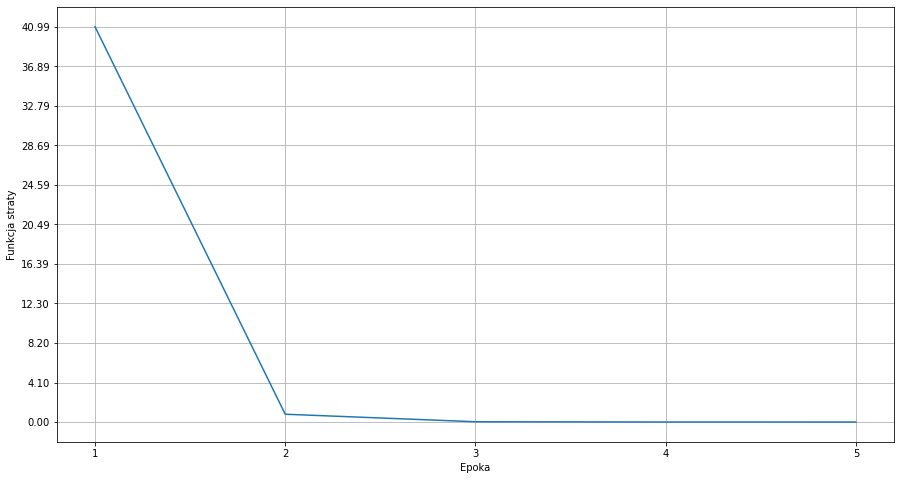

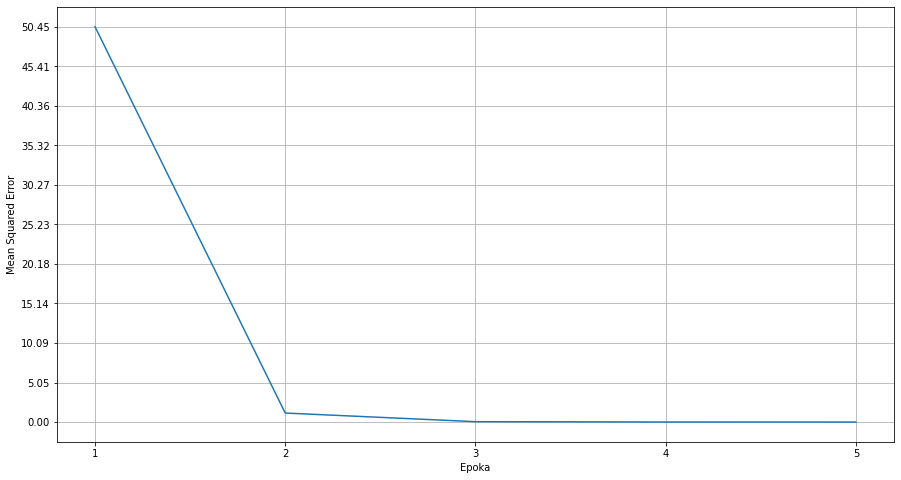

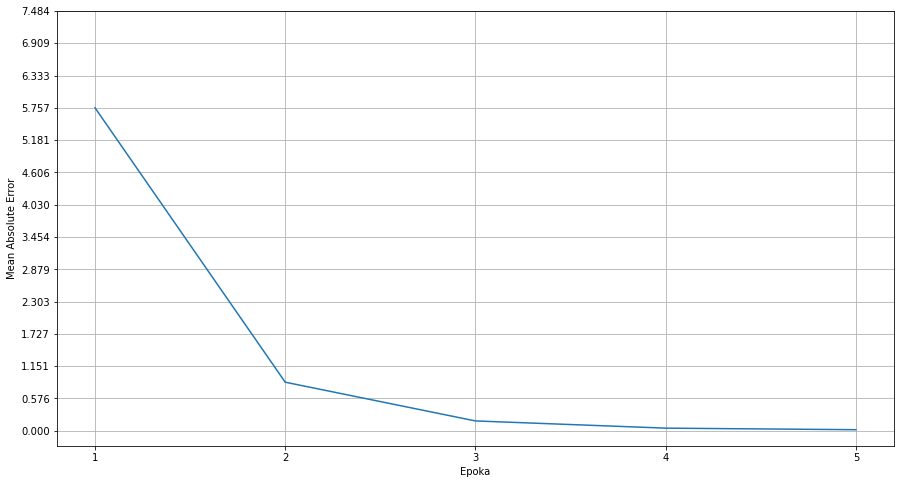

In [6]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

model = SGDRegressor(verbose=1)

mean_squared_errors = []
mean_absolute_errors = []

epochs = 5
minibatch_size = 256
minibatches_in_epoch = ceil(len(X_train) / minibatch_size)

for epoch_i in range(epochs):
    for minibatch in range(0, len(X_train), minibatch_size):
        minibatch_end = minibatch + minibatch_size
        if 2 * minibatch > len(X_train):
            minibatch_end = len(X_train)
        model.partial_fit(X_train[minibatch:minibatch_end,], y_train[minibatch:minibatch_end,])
    y_pred = model.predict(X_val)
    mean_squared_errors.append(sklearn.metrics.mean_squared_error(y_val, y_pred))
    mean_absolute_errors.append(sklearn.metrics.mean_absolute_error(y_val, y_pred))
        
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
epoch_end = 0
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    if epoch_end == minibatches_in_epoch - 1:
        loss_list.append(float(line.split("loss: ")[-1]))
        epoch_end = 0
    else:
        epoch_end += 1
    
show_plot(epochs + 1, 'Epoka', loss_list, 'Funkcja straty')
show_plot(epochs + 1, 'Epoka', mean_squared_errors, 'Mean Squared Error')
show_plot(epochs + 1, 'Epoka', mean_absolute_errors, 'Mean Absolute Error')

- co minibatch

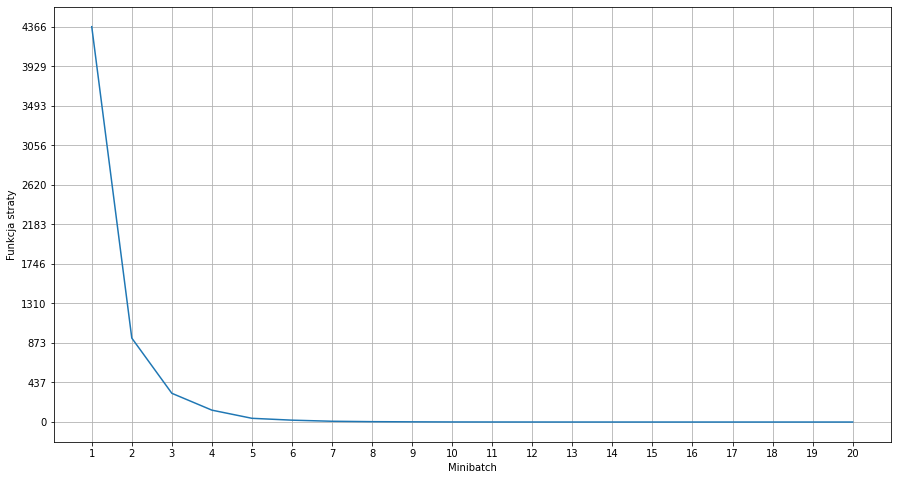

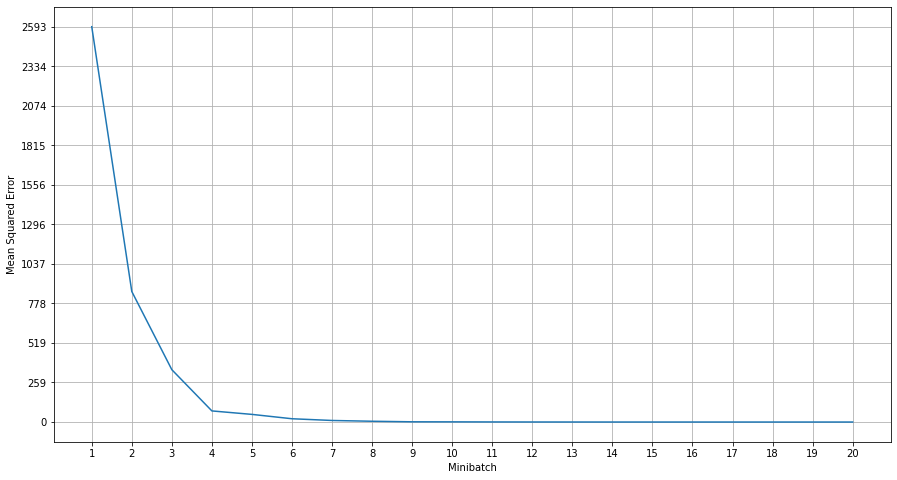

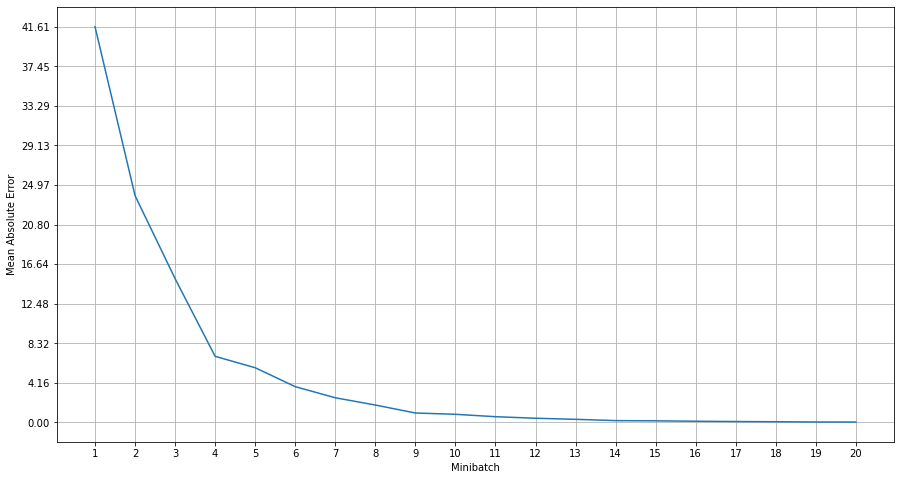

In [7]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

model = SGDRegressor(verbose=1)

mean_squared_errors = []
mean_absolute_errors = []

epochs = 4
minibatch_size = 256
minibatches_in_epoch = ceil(len(X_train) / minibatch_size)

for epoch_i in range(epochs):
    for minibatch in range(0, len(X_train), minibatch_size):
        minibatch_end = minibatch + minibatch_size
        if 2 * minibatch > len(X_train):
            minibatch_end = len(X_train)
        model.partial_fit(X_train[minibatch:minibatch_end,], y_train[minibatch:minibatch_end,])
        y_pred = model.predict(X_val)
        mean_squared_errors.append(sklearn.metrics.mean_squared_error(y_val, y_pred))
        mean_absolute_errors.append(sklearn.metrics.mean_absolute_error(y_val, y_pred))
        
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
epoch_end = 0
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

show_plot(epochs * minibatches_in_epoch + 1, 'Minibatch', loss_list, 'Funkcja straty')
show_plot(epochs * minibatches_in_epoch + 1, 'Minibatch', mean_squared_errors, 'Mean Squared Error')
show_plot(epochs * minibatches_in_epoch + 1, 'Minibatch', mean_absolute_errors, 'Mean Absolute Error')

c) wizualizacja przeuczenia

Dla modeli z sklearn, dla części treningowej i testowej, co epokę, łatwiej jest otrzymać wyniki metryk niż funkcji straty. Dlatego też jako czynnik decydujący o przeuczeniu wybrano średnią dokładność modelu (wynik z metody score), a nie funkcję straty.

In [8]:
digits_ds = ds.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits_ds.data, digits_ds.target, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
classes = np.unique(y_train)

model = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4,
                    solver='adam', verbose=0, tol=1e-8, random_state=1,
                    learning_rate_init=.01)

train_scores = []
test_scores = []

epochs = 50
minibatch_size = 128
minibatches_in_epoch = ceil(len(X_train) / minibatch_size)

for epoch_i in range(epochs):
    for minibatch in range(0, len(X_train), minibatch_size):
        minibatch_end = minibatch + minibatch_size
        if 2 * minibatch > len(X_train):
            minibatch_end = len(X_train)
        model.partial_fit(X_train[minibatch:minibatch_end,], y_train[minibatch:minibatch_end,], classes=classes)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

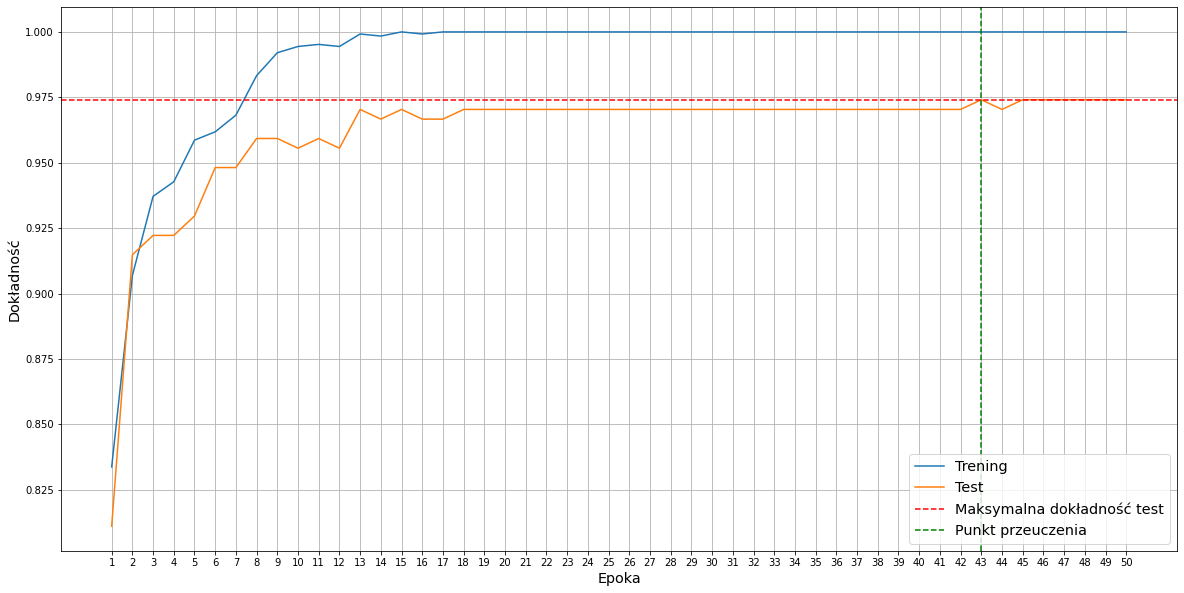

In [9]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(list(range(1, epochs + 1)), train_scores, label='Trening')
plt.plot(list(range(1, epochs + 1)), test_scores, label='Test')
plt.xticks(np.arange(1, epochs + 1, step=1))
plt.axhline(max(test_scores), color='r', linestyle='--', label='Maksymalna dokładność test')
plt.axvline(np.argmax(test_scores) + 1, color='green', linestyle='--', label='Punkt przeuczenia')
plt.xlabel('Epoka', fontsize='x-large')
plt.ylabel('Dokładność', fontsize='x-large')
plt.grid()
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

d) wypisywanie gradientów parametrów: co epokę, co mini-batch

In [10]:
regression_ds = ds.make_regression(n_samples=2000, n_features=5, n_targets=1)
X_train, X_test, y_train, y_test = train_test_split(regression_ds[0], regression_ds[1])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

- co epokę

Modele z sklearn nie oferują możliwości sprawdzenia gradientu. Najbliższą informacją są wartości współczynników, których różnica pomiędzy epokami/mini-batchami i uwzględnienie alpha dałyby gradienty.
Jednakże współczynniki modelu przed użyciem funkcji fit (albo też partial_fit) nie są dostępne. Dlatego też obliczenie pierwszego gradientu nie jest możliwe.

In [11]:
model = SGDRegressor()

epochs = 5
minibatch_size = 256
minibatches_in_epoch = ceil(len(X_train) / minibatch_size)

print('Współczynniki:')
for epoch_i in range(epochs):
    for minibatch in range(0, len(X_train), minibatch_size):
        minibatch_end = minibatch + minibatch_size
        if 2 * minibatch > len(X_train):
            minibatch_end = len(X_train)
        model.partial_fit(X_train[minibatch:minibatch_end,], y_train[minibatch:minibatch_end,])
    print(f'Epoka {epoch_i + 1}:')
    print(model.coef_)

Współczynniki:
Epoka 1:
[77.21150277  3.5927794  74.81101482 20.46915445 42.08056887]
Epoka 2:
[83.17474133  3.50544544 79.42761426 21.79408307 44.65730762]
Epoka 3:
[84.16915088  3.46570608 80.10855636 22.01322189 45.02772874]
Epoka 4:
[84.37820152  3.45557346 80.23721581 22.05755213 45.0962452 ]
Epoka 5:
[84.42812713  3.45262315 80.26506088 22.06831653 45.1108888 ]


- co minibatch

In [12]:
model = SGDRegressor()

epochs = 2
minibatch_size = 256
minibatches_in_epoch = ceil(len(X_train) / minibatch_size)

print('Współczynniki:')
for epoch_i in range(epochs):
    for minibatch_i, minibatch in enumerate(range(0, len(X_train), minibatch_size)):
        minibatch_end = minibatch + minibatch_size
        if 2 * minibatch > len(X_train):
            minibatch_end = len(X_train)
        model.partial_fit(X_train[minibatch:minibatch_end,], y_train[minibatch:minibatch_end,])
        print(f'Epoka {epoch_i + 1} Minibatch {minibatch_i + 1}:')
        print(model.coef_)

Współczynniki:
Epoka 1 Minibatch 1:
[39.02100582  2.28128735 42.66033286 12.13947256 22.74714858]
Epoka 1 Minibatch 2:
[56.53299054  4.13896709 62.01240536 14.61315753 34.19933538]
Epoka 1 Minibatch 3:
[67.03444296  4.26996348 68.77811498 17.83730435 38.40125172]
Epoka 1 Minibatch 4:
[75.73504492  3.93888201 74.37299279 20.1300103  41.77257754]
Epoka 1 Minibatch 5:
[77.29999264  3.65320669 75.14933869 20.45911175 42.30934037]
Epoka 2 Minibatch 1:
[79.26129253  3.58477241 76.69553197 20.94874455 43.06009376]
Epoka 2 Minibatch 2:
[80.71606382  3.6484623  78.09680283 21.12047074 43.87893479]
Epoka 2 Minibatch 3:
[81.84276395  3.62289635 78.72520285 21.45131547 44.26054439]
Epoka 2 Minibatch 4:
[82.9570661   3.55611346 79.37718674 21.74265864 44.63191983]
Epoka 2 Minibatch 5:
[83.18418164  3.51428671 79.47961465 21.79078703 44.69819521]
